**1. Define the metric for success**

To predict which individuals are the most likely to have or use a bank account

**2. Explain the context**


The most individuals who use a bank are determined by use of year variables, household size and respondent age variables. The financial data given is cleaned by checking for outliers,dropping null values, checking for anomalies and removing any missing values. Univariate analysis is used to draw a histogram for each year, household size and respondent age.Bivariate used to check correlation matrix between the variables and multivariate analysis using factor analysis to explore large datasets and find interlinked associations. It also reduce the observed variables into a few unobserved variables. 


**3. The experimental design taken and the appropriateness of the available data to answer the questions given**





In [82]:
|# The visualization were showed by use of histogram, line bar graphs which was used in solving the problem


**Importing Data**

In [39]:
# linear algebra
import numpy as np

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

from subprocess import check_output
print(check_output)

# Any results you write to the current directory are saved as output.

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<function check_output at 0x7f7a89ad64d0>


**Reading data**

In [40]:
# Reading the data
financial_data = pd.read_csv('http://bit.ly/FinancialDataset')


**4. Checking for Data**

In [41]:
# Previewing the top of our dataset
financial_data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [42]:
# Numerical features description
financial_data.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [43]:
# Previewing the bottom of our dataset
financial_data.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [44]:
# Determining the no. of records in our dataset

# Get the number of rows and columns
rows = len(financial_data.axes[0])
cols = len(financial_data.axes[1])
  
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 23524
Number of Columns: 13


In [45]:
# Checking whether each column has an appropriate datatype
financial_data.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

**5. Tidying data**

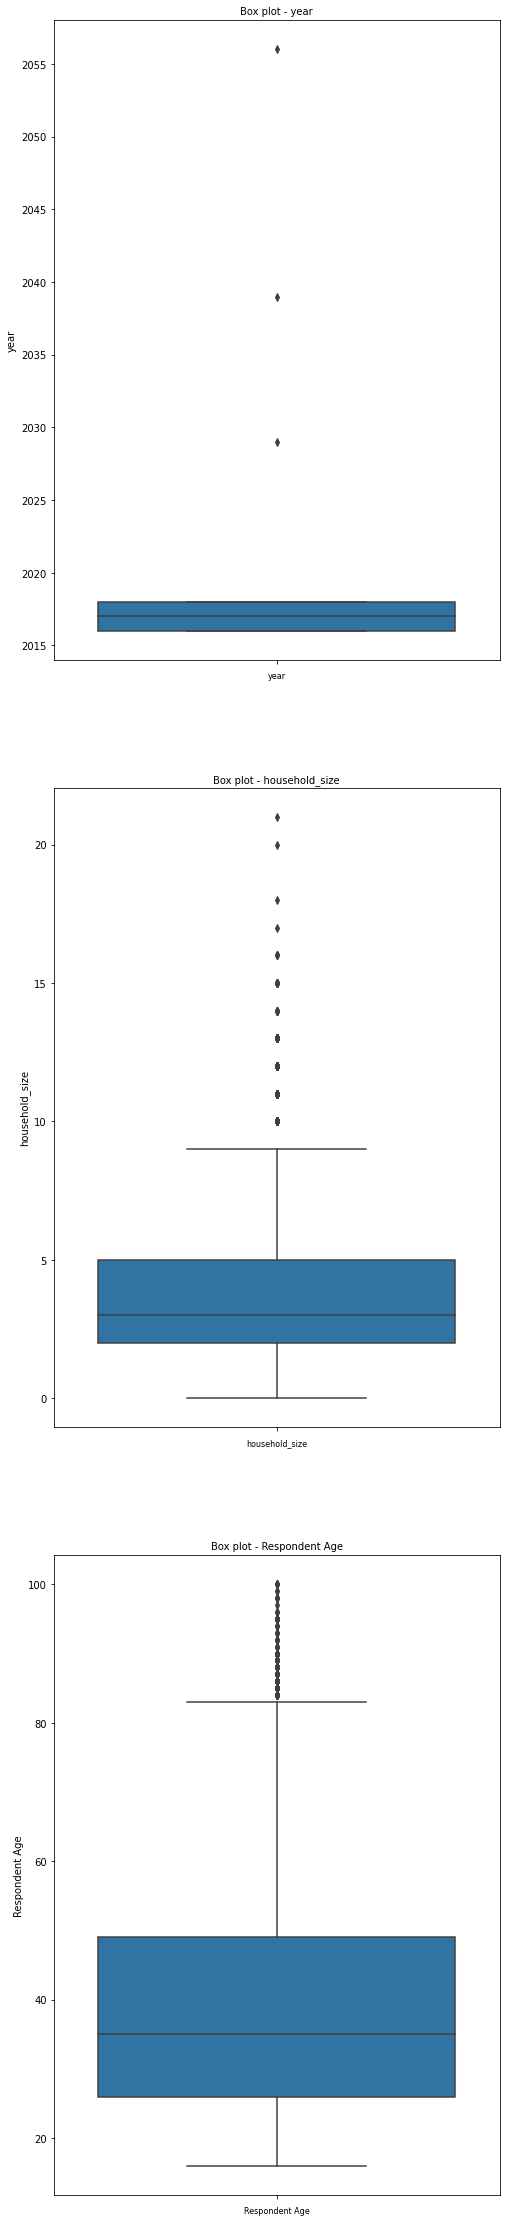

In [46]:
# Checking for outliers
column_names = ['year','household_size', 'Respondent Age']

fig, ax = plt.subplots(len(column_names), figsize=(8,40))

for i, col_val in enumerate(column_names):

    sns.boxplot(y=financial_data[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

# There are no outliers in data

In [47]:
# Dropping the null values

# Calculate the first and third quartile (Q1 and Q3).

# Evaluate the interquartile range, IQR = Q3-Q1.

# Estimate the lower bound, the lower bound = Q1*1.5

# Estimate the upper bound, upper bound = Q3*1.5

# Replace the data points that lie outside of the lower and the upper bound with a NULL value.

for x in ['year']:
    q75,q25 = np.percentile(financial_data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    financial_data.loc[financial_data[x] < min,x] = np.nan
    financial_data.loc[financial_data[x] > max,x] = np.nan

In [48]:
for x in ['household_size']:
    q75,q25 = np.percentile(financial_data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    financial_data.loc[financial_data[x] < min,x] = np.nan
    financial_data.loc[financial_data[x] > max,x] = np.nan

In [49]:
for x in ['Respondent Age']:
  q75,q25 = np.percentile(financial_data.loc[:,x],[75,25])
  intr_qr = q75-q25
 
  max = q75+(1.5*intr_qr)
  min = q25-(1.5*intr_qr)
 
  financial_data.loc[financial_data[x] < min,x] = np.nan
  financial_data.loc[financial_data[x] > max,x] = np.nan

In [50]:
financial_data.isnull().sum()

country                   14
year                       3
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [51]:
financial_data.dropna(axis = 0)

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018.0,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018.0,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018.0,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018.0,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018.0,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018.0,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018.0,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018.0,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018.0,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [52]:
financial_data.isnull().sum()

country                   14
year                       3
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [53]:
# Checking for Anomalies
#
financial_data.nunique() 

country                      4
year                         3
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [54]:
# This returns the total number of missing values across different columns
financial_data.isnull().sum()

country                   14
year                       3
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

**Removing any missing values**

In [55]:
# Cleaning Data by forward filling

financial_data["Has a Bank account"] = financial_data["Has a Bank account"].fillna(method='ffill')
financial_data["Respondent Age"] = financial_data["Respondent Age"].fillna(method='ffill')
financial_data.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018.0,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018.0,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018.0,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018.0,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018.0,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [56]:
# More data cleaning procedures
# Dropping unnecessary columns
financial_data.dropna()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018.0,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018.0,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018.0,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018.0,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018.0,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018.0,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018.0,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018.0,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018.0,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [57]:
# Dropping missing values rows
financial_data.dropna(inplace=True)

**Univariate Analysis with python**

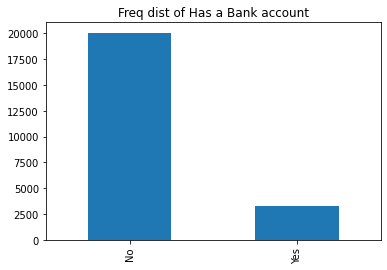

In [58]:
# frequency distribution of has bank variable
financial_data['Has a Bank account'].value_counts().plot.bar(title='Freq dist of Has a Bank account')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

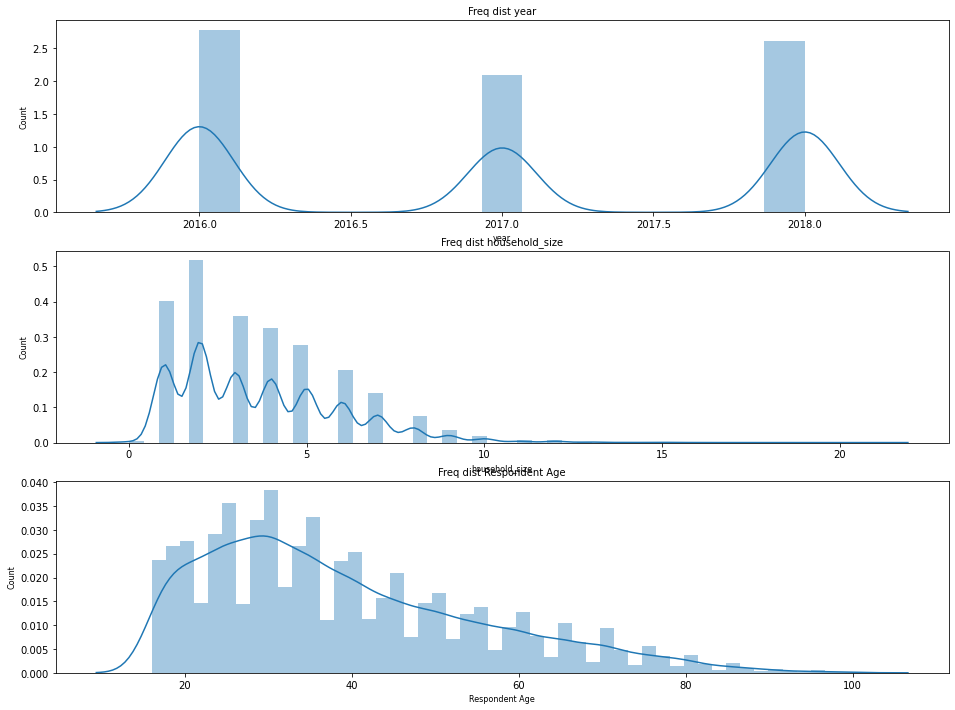

In [59]:
# ---
# Creating a histogram from a given dataset using values from the points column
# ---
# Dataset url = http://bit.ly/FinancialDataset
# ---
#

# Loading out dataset

col_names = ['year','household_size', 'Respondent Age']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))
for i, col_val in enumerate(col_names):
  
    sns.distplot(financial_data[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()




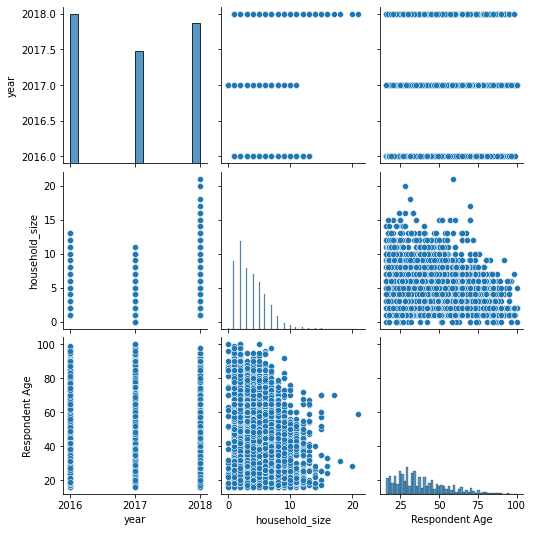

In [60]:
financial_data_hist = financial_data.drop(['year','household_size', 
'Respondent Age'], axis=1)
sns.pairplot(financial_data)

**Bivariate Analysis with Python**

Scatter plot



In [61]:
# Create a scatter plot between the Has a Bank account and Respondent Age	 stampage trees
# Dataset url  = http://bit.ly/FinancialDataset
# Dataset info = The age, address, bank account,cell phone and level of study 
# ---
#
# Importing Pandas
#
import pandas as pd
# Importing Numpy
#
import numpy as np
# Importing Seaborn
#
import seaborn as sns
# Importing Matplotlib
#
import matplotlib.pyplot as plt

In [62]:

# Loading our dataset
financial_dt = pd.read_csv("http://bit.ly/FinancialDataset")

# Previewing our dataset
financial_dt.head()



,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


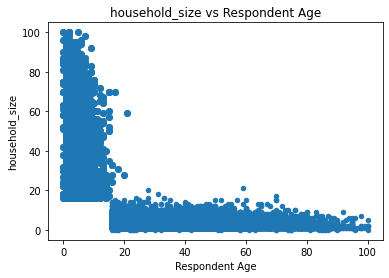

In [63]:
# Using Pandas: Plotting our scatterplot to compare the variables
financial_dt.plot(y = 'household_size', x = 'Respondent Age', kind='scatter')

# Or Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(financial_dt['household_size'] , financial_dt["Respondent Age"])

# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = financial_dt['household_size'], y = financial_dt["Respondent Age"], fit_reg=False)

# Giving our scatterplot a title
plt.title('household_size vs Respondent Age')

# Labelling our x axis
plt.ylabel('household_size')

# Labelling our y axis
plt.xlabel('Respondent Age')

# We then display our scatterplot as shown below
plt.show()



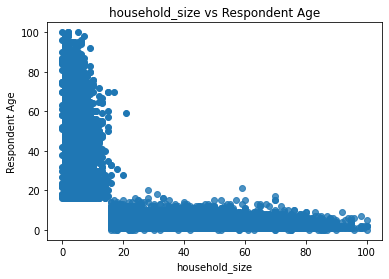

In [64]:
# Using Pandas: Plotting our scatterplot to compare the variables
financial_dt.plot(x = 'household_size', y = 'Respondent Age', kind='scatter')

# Or Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(financial_dt['household_size'] , financial_dt["Respondent Age"])

# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(y = financial_dt['household_size'], x = financial_dt["Respondent Age"], fit_reg=False)

# Giving our scatterplot a title
plt.title('household_size vs Respondent Age')

# Labelling our x axis
plt.xlabel('household_size')

# Labelling our y axis
plt.ylabel('Respondent Age')

# We then display our scatterplot as shown below
plt.show()

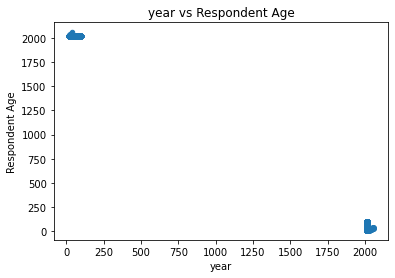

In [65]:
# Using Pandas: Plotting our scatterplot to compare the variables
financial_dt.plot(y = 'year', x = 'Respondent Age', kind='scatter')


# Or Using Matplotlib: Plotting our scatterplot to compare the variables
plt.scatter(financial_dt['year'] , financial_dt["Respondent Age"])

# Or Using Seaborn: Using the function regplot to create our scatterplot
sns.regplot(x = financial_dt['year'], y = financial_dt["Respondent Age"], fit_reg=False)

# Giving our scatterplot a title
plt.title('year vs Respondent Age')

# Labelling our x axis
plt.xlabel('year')

# Labelling our y axis
plt.ylabel('Respondent Age')

# We then display our scatterplot as shown below
plt.show()

**Linear correlation**

In [66]:
# Determine the relationship between the household_size and Respondent Age 
# by determining the correlation coeffient.
# Dataset url = http://bit.ly/AutoMPGDataset
# Dataset info = The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository 
# ---
#

# Loading the dataset
financial_dt = pd.read_csv("http://bit.ly/FinancialDataset") 

# Previewing the dataframe
financial_dt.head()

# Calculating the pearson coefficient
pearson_coeff = financial_dt["household_size"].corr(financial_dt["Respondent Age"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = financial_dt["household_size"].corr(financial_dt["Respondent Age"]) 
print(coeff)

-0.11970929714642328
-0.11970929714642328


There is a negative correlation between the variables

In [67]:
# Determine the relationship between the year and Respondent Age 
# by determining the correlation coeffient.
# Dataset url = http://bit.ly/AutoMPGDataset
# Dataset info = The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository 
# ---
#

# Loading the dataset
financial_dt = pd.read_csv("http://bit.ly/FinancialDataset") 

# Previewing the dataframe
financial_dt.head()

# Calculating the pearson coefficient
pearson_coeff = financial_dt["year"].corr(financial_dt["Respondent Age"], method="pearson") 
print(pearson_coeff)

# Checking whether you have to define the pearson
coeff = financial_dt["year"].corr(financial_dt["Respondent Age"]) 
print(coeff)

-0.01956987264962113
-0.01956987264962113


There is a negative correlation between the variables

**The  correlation matrix**

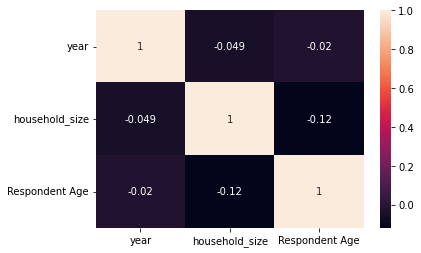

In [68]:
# Relation between numerical and variables
sns.heatmap(financial_dt.corr(),annot = True)
plt.show()

There is a negative correlation

**Multivariate Analysis**

Factor Analysis

In [69]:
# Factor Analysis on BFI Dataset below
# Dataset url = ("http://bit.ly/FinancialDataset") 

# Import dataset
import pandas as pd

import matplotlib.pyplot as plt

In [70]:
financial_data = pd.read_csv('http://bit.ly/FinancialDataset')

In [71]:
# Previewing the dataset columns
financial_data.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [72]:
# Dropping unnecessary columns 
financial_data.drop(['country', 'uniqueid', 'Has a Bank account', 
                     'Type of Location','The relathip with head', 
                     'marital_status','Level of Educuation', 'Type of Job',
                     'Cell Phone Access','Cell Phone Access','gender_of_respondent' ]
                    ,axis=1,inplace=True)

In [73]:
# Dropping missing values rows
financial_data.dropna(inplace=True)

In [74]:
# Checking the datatypes
# 
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23468 entries, 0 to 23523
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            23468 non-null  int64  
 1   household_size  23468 non-null  float64
 2   Respondent Age  23468 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 733.4 KB


In [75]:
# Previewing our dataset
# 
financial_data.head()

,year,household_size,Respondent Age
0,2018,3.0,24.0
1,2018,5.0,70.0
2,2018,5.0,26.0
3,2018,5.0,34.0
4,2018,8.0,26.0


In [76]:
# Find factorability using Bartlett’s Test to check whether or not the observed
# variables intercorrelate at all
# Installing factor analyzer 
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value=calculate_bartlett_sphericity(financial_data)
chi_square_value, p_value
# In Bartlett ’s test, the p-value is 0. The test was statistically significant, 
# indicating that the observed correlation matrix is not an identity matrix.

(410.5176255272231, 5.818435504831497e-89)

In [77]:

# Kaiser-Meyer-Olkin (KMO) Test that is used to measures the suitability of data
# for factor analysis.

from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(financial_data)
# This value indicates that you can proceed with your planned factor analysis.



In [78]:
# Choosing the Number of Factors
# For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.
# 
from factor_analyzer.factor_analyzer import FactorAnalyzer

# Creating factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(financial_data, 3, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Here, we can see only for 6-factors eigenvalues are greater than one. 
# It means we need to choose only 6 factors (or unobserved variables).

,Original_Eigenvalues
0,1.123605
1,1.013410
2,0.862985


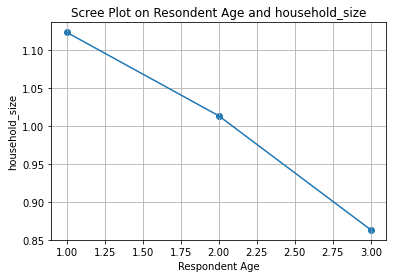

In [79]:
# The scree plot method draws a straight line for each factor and its eigenvalues. 
# Number eigenvalues greater than one considered as the number of factors.

# Creating a scree plot using matplotlib
#
plt.scatter(range(1,financial_data.shape[1]+1),ev)
plt.plot(range(1,financial_data.shape[1]+1),ev)
plt.title('Scree Plot on Resondent Age and household_size')
plt.xlabel('Respondent Age')
plt.ylabel('household_size')
plt.grid()
plt.show()

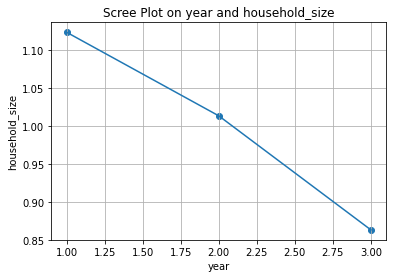

In [80]:
# The scree plot method draws a straight line for each factor and its eigenvalues. 
# Number eigenvalues greater than one considered as the number of factors.

# Creating a scree plot using matplotlib
#
plt.scatter(range(1,financial_data.shape[1]+1),ev)
plt.plot(range(1,financial_data.shape[1]+1),ev)
plt.title('Scree Plot on year and household_size')
plt.xlabel('year')
plt.ylabel('household_size')
plt.grid()
plt.show()

In [81]:
# Creating factor analysis object and perform factor analysis
#
fa = FactorAnalyzer()
fa.analyze(financial_data, 3, rotation="varimax")
fa.loadings

# We will note that
# Factor 1 has high factor loadings for household size, respondent age and year 
# Factor 2 has high factor loadings for household size, respondent age and year  
# Factor 3 has none of the high loagings for any variable and is not easily interpretable


,Factor1,Factor2,Factor3
year,0.005039,0.267167,0.0
household_size,-0.360610,-0.177017,0.0
Respondent Age,0.370871,-0.079278,0.0


In [82]:
# Getting variance of each factors
# 
fa.get_factor_variance()
# It reduces the observed variables into a few unobserved variables
# It helps in improve questionnaire in for future surveys

,Factor1,Factor2,Factor3
SS Loadings,0.267610,0.108998,0.000000
Proportion Var,0.089203,0.036333,0.000000
Cumulative Var,0.089203,0.125536,0.125536
